In [41]:
import os

import pandas as pd 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [26]:
GRACE_path = "/home/kmk58/remoteData/GRACE_NEW/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/"
GRACE_files = os.listdir(GRACE_path)
GRACE_files = filter(lambda file: file.endswith(".nc"), GRACE_files)
GRACE_files = [GRACE_path + x for x in GRACE_files]
#print(GRACE_files)

GRACE_FO_path = "/home/kmk58/remoteData/GRACEFO/"
GRACE_FO_files = os.listdir(GRACE_FO_path)
GRACE_FO_path_nc = filter(lambda file: file.endswith(".nc"), GRACE_FO_files)
GRACE_FO_files = [GRACE_FO_path + x for x in GRACE_FO_path_nc]
print(GRACE_FO_files)

['/home/kmk58/remoteData/GRACEFO/GRD-3_2018152-2018181_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2018182-2018199_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2018295-2018313_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2018305-2018334_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2018335-2018365_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2019001-2019031_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2019026-2019065_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2019060-2019090_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2019091-2019120_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2019121-2019151_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO/GRD-3_2019152-2019181_GRFO_UTCSR_BA01_0601_LND_v04.nc', '/home/kmk58/remoteData/GRACEFO

In [49]:
dict_grace = {}

for filename in list(reversed(GRACE_FO_files)) + GRACE_files:
    df1 = xr.open_dataset(filename) 
    df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
    mean_lwe = df1_subset['lwe_thickness'].values.mean()
    date = df1_subset['time'].values[0]
    date = pd.to_datetime(str(date)).strftime('%Y.%m.%d')
    dict_grace[date] = mean_lwe
    print(dict_grace)

{'2023.03.16': 0.08247184414980616}
{'2023.03.16': 0.08247184414980616, '2023.02.15': 0.07859847954604549}
{'2023.03.16': 0.08247184414980616, '2023.02.15': 0.07859847954604549, '2023.01.16': 0.03760187043049142}
{'2023.03.16': 0.08247184414980616, '2023.02.15': 0.07859847954604549, '2023.01.16': 0.03760187043049142, '2022.12.16': -0.006595566702727892}
{'2023.03.16': 0.08247184414980616, '2023.02.15': 0.07859847954604549, '2023.01.16': 0.03760187043049142, '2022.12.16': -0.006595566702727892, '2022.11.16': -0.06376482347851009}
{'2023.03.16': 0.08247184414980616, '2023.02.15': 0.07859847954604549, '2023.01.16': 0.03760187043049142, '2022.12.16': -0.006595566702727892, '2022.11.16': -0.06376482347851009, '2022.10.16': -0.08738082358958915}
{'2023.03.16': 0.08247184414980616, '2023.02.15': 0.07859847954604549, '2023.01.16': 0.03760187043049142, '2022.12.16': -0.006595566702727892, '2022.11.16': -0.06376482347851009, '2022.10.16': -0.08738082358958915, '2022.09.16': -0.04520518741236835}

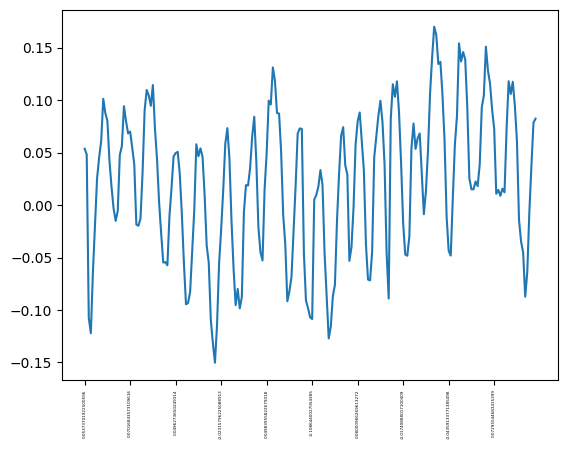

In [63]:
lists = sorted(dict_grace.items())

x, y = zip(*lists)
plt.plot(x,y)
plt.xticks(x, [str(i) for i in y], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=3)
plt.locator_params(axis='x', nbins=10) 
plt.show()

#df = pd.DataFrame.from_dict(dict_grace, orient='index')
#df